In [42]:
import pandas as pd

import numpy as np

import re

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
fm_df = pd.read_csv('ForumMessages.csv', encoding='utf-8')



fm_df.head()

In [44]:
user_df=pd.read_csv("users.csv")

In [45]:
import plotly.tools as tls

import plotly.offline as py

import plotly.graph_objs as go

In [46]:
from bs4 import BeautifulSoup

In [47]:
py.init_notebook_mode(connected=True)

In [48]:
from sklearn.model_selection import cross_validate

In [49]:
from sklearn.model_selection import StratifiedKFold

In [50]:
from sklearn.model_selection import learning_curve

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
from sklearn.decomposition import TruncatedSVD

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [56]:
from sklearn.pipeline import Pipeline


In [57]:
py.init_notebook_mode(connected=True)

In [58]:
train=pd.read_csv("mbti_1.csv")

In [59]:
train.shape

(8675, 2)

In [60]:
#user_df=pd.read_csv("Users.csv")



In [61]:
fm_df=pd.read_csv("ForumMessages.csv")

In [62]:




mbti={'I':'Introversion','E':'Extroversion','N':'Intutions','S':'Sensing','T':'Thinking','F':'Feeling','J':'Judging','P':'Perceive'}

In [63]:
cnt_srs=train['type'].value_counts()


import seaborn as sns


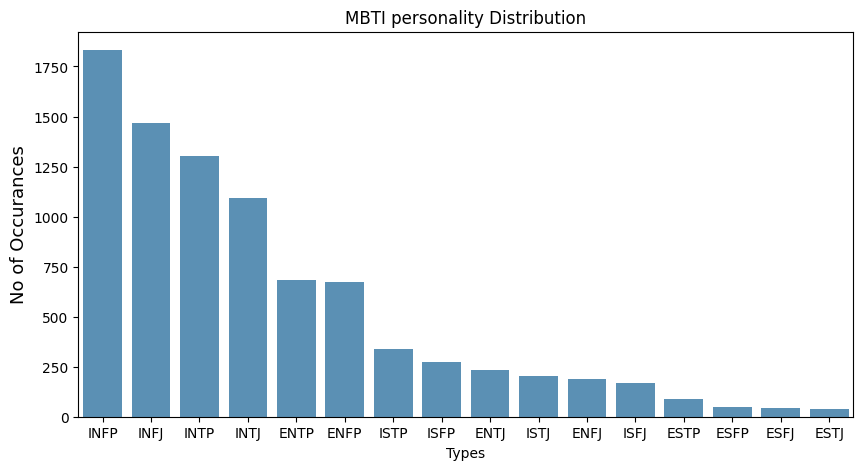

In [64]:
plt.figure(figsize=(10,5))
colors = plt.cm.rainbow(np.linspace(0, 1, 5))  # Rainbow colors
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8)









#colors = plt.cm.rainbow(np.linspace(0, 1, 5))  # Rainbow colors

#sns.barplot(x,y,c=colors,cmap='rainbow')
plt.ylabel("No of Occurances",fontsize=13)
plt.title("MBTI personality Distribution")
plt.xlabel("Types")
plt.show()
           

In [65]:
fm_df['Message']=fm_df['Message'].fillna('')

In [66]:
fm_df.columns

Index(['Unnamed: 0', 'Id', 'ForumTopicId', 'PostUserId', 'PostDate',
       'ReplyToForumMessageId', 'Message', 'Medal', 'MedalAwardDate'],
      dtype='object')

In [67]:
fm_df_join=fm_df.groupby('PostUserId')['Message'].agg(lambda col:''.join(col)).reset_index()

In [68]:
etree=ExtraTreesClassifier(n_estimators=20,max_depth=5,n_jobs=-1)

tfidf=TfidfVectorizer(ngram_range=(1,1),stop_words='english')

tsvd=TruncatedSVD(n_components=10)

model=Pipeline([('tfidf1',tfidf),('tsvd1',tsvd),('etree1',etree)])


In [69]:
kfolds=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)


In [70]:
#results = cross_validate(model, train['posts'], train['type'], cv=kfolds, scoring=scoring, n_jobs=-1)


In [71]:
np.random.seed(1)

In [72]:
#model.fit(train['posts'], train['type'])


In [73]:
scoring = {'acc':'accuracy',
          'neg_log_loss':'neg_log_loss',
           'f1_micro':'f1_micro'}



In [74]:
Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [75]:
#model.fit(train['posts'], train['type'])


In [76]:
#results=cross_validate(model,train['posts'],train['type'],cv=kfolds,scoring=scoring,n_jobs=-1)

results=cross_validate(model,train['posts'],train['type'],cv=kfolds,scoring=scoring,n_jobs=-1)

In [77]:
print("CV Accuracy {:0.5f} (+/- {:0.5f})".format(np.mean(results['test_acc']),np.std(results['test_acc'])))

CV Accuracy 0.31470 (+/- 0.02004)


In [78]:
print("CV F1 {:0.5f} (+/- {:0.5f})".format(np.mean(results['test_f1_micro']),np.std(results['test_f1_micro'])))

CV F1 0.31470 (+/- 0.02004)


In [79]:
print("CV Logg loss {:0.5f} (+/- {:0.5f})".format(np.mean(results['test_neg_log_loss']),np.std(results['test_neg_log_loss'])))

CV Logg loss -2.11593 (+/- 0.01559)


In [80]:
def cleanText(text):
    text=(BeautifulSoup,'html.parser',text)
    text=(re.sub(r'\|\|\|',r'',text))
    text=re.sub(r'http\S+',r'<url>',text)

    return text

In [109]:
#train['clean_posts']=train['posts'].apply(cleanText)

In [110]:
from bs4 import BeautifulSoup
import re

def cleanText(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'\|\|\|', '', text)
    text = re.sub(r'http\S+', '<url>', text)
    return text


In [111]:
train['clean_posts']=train['posts'].apply(cleanText)

In [112]:
#train['clean_posts']=train['posts'].apply(cleanText)

#model_lr=Pipeline([('tfidf1',tfidf2),('lr',LogisticRegression())])

In [113]:
train_sizes,train_score,test_score=\
learning_curve(model_lr,train['clean_posts'],train['type'],cv=kfolds,n_jobs=-1,scoring='f1_micro',
               train_sizes=np.linspace(0.1,1.0,10),random_state=1)


In [89]:
from bs4 import BeautifulSoup

def cleanText(text):
    #text = BeautifulSoup(text, 'xml').get_text()
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'\|\|\|', '', text)
    text = re.sub(r'http\S+', '<url>', text)
    return text


In [90]:
train['clean_posts']=train['posts'].apply(cleanText)

In [91]:
np.random.seed(1)

tfidf2= CountVectorizer(ngram_range=(1,1),
                        stop_words='english',
                        lowercase=True,
                        max_features=5000)

model_nb=Pipeline([('tfidf1',tfidf2),('nb',MultinomialNB())])

results_nb=cross_validate(model_nb,train['clean_posts'],train['type'],cv=kfolds,
                          scoring=scoring,n_jobs=-1)
                        

In [92]:
model_lr=Pipeline([('tfidf1',tfidf2),('lr',LogisticRegression())])

In [93]:
model_lr=Pipeline([('tfidf1',tfidf2),('lr',LogisticRegression())])

In [94]:
print("CV Accuracy {:0.5f} (+/- {:0.5f})".format(np.mean(results_nb['test_acc']),np.std(results['test_acc'])))

CV Accuracy 0.56334 (+/- 0.02004)


In [95]:
print("CV F1 {:0.5f} (+/- {:0.5f})".format(np.mean(results['test_f1_micro']),np.std(results_nb['test_f1_micro'])))

CV F1 0.31470 (+/- 0.01269)


In [96]:
print("CV Log loss {:0.5f} (+/- {:0.5f})".format(np.mean(results_nb['test_neg_log_loss']),np.std(results['test_neg_log_loss'])))

CV Log loss -6.22494 (+/- 0.01559)


In [97]:
train_sizes,train_scores,test_scores=\
learning_curve(model_lr,train['clean_posts'],train['type'],cv=kfolds,n_jobs=-1,scoring='f1_micro',
               train_sizes=np.linspace(0.1,1.0,10),random_state=1)

In [98]:
def plot_learning_curve(x,y,train_sizes,train_scores,test_scores,title=' ' ,ylim=None,figsize=(15,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("training_examples",fontsize=15)
    plt.ylabel("scores",fontsize=15)
    plt.grid()

    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()

    plt.fill_between(train_sizes,(train_scores_mean-train_scores_std),(train_scores_mean + train_scores_std),color='b',alpha=0.1)

    plt.fill_between(train_sizes,(test_scores_mean-test_scores_std),(test_scores_mean + test_scores_std),color='g',alpha=0.1)

    plt.plot(train_sizes,train_scores_mean,'o-',label="train_scores",color='r',alpha=0.1)

    plt.plot(train_sizes,test_scores_mean,'o-',label="cross_validate_scores",color='b',alpha=0.1)

    plt.legend(loc="best")
    return plt
    
             

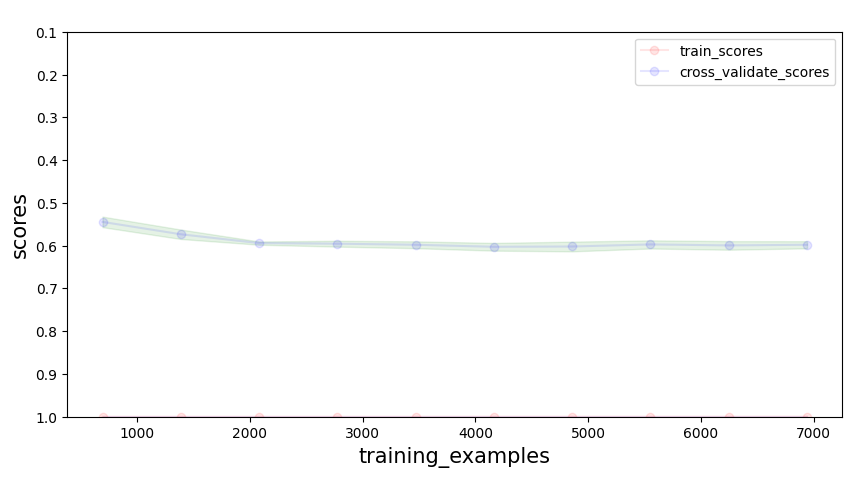

<Figure size 1500x750 with 0 Axes>

<Figure size 1500x750 with 0 Axes>

In [99]:
plot_learning_curve(train['posts'],train['type'],train_sizes,train_scores,test_scores,ylim=(1.0,0.1),figsize=(10,5))
plt.show()

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10, 5), dpi=150)

In [100]:
fm_df_join['clean_comments']=fm_df_join['Message'].apply(cleanText)



In [101]:
model_lr.fit(train['clean_posts'],train['type'])

pred_all=model_lr.predict(fm_df_join['clean_comments'])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



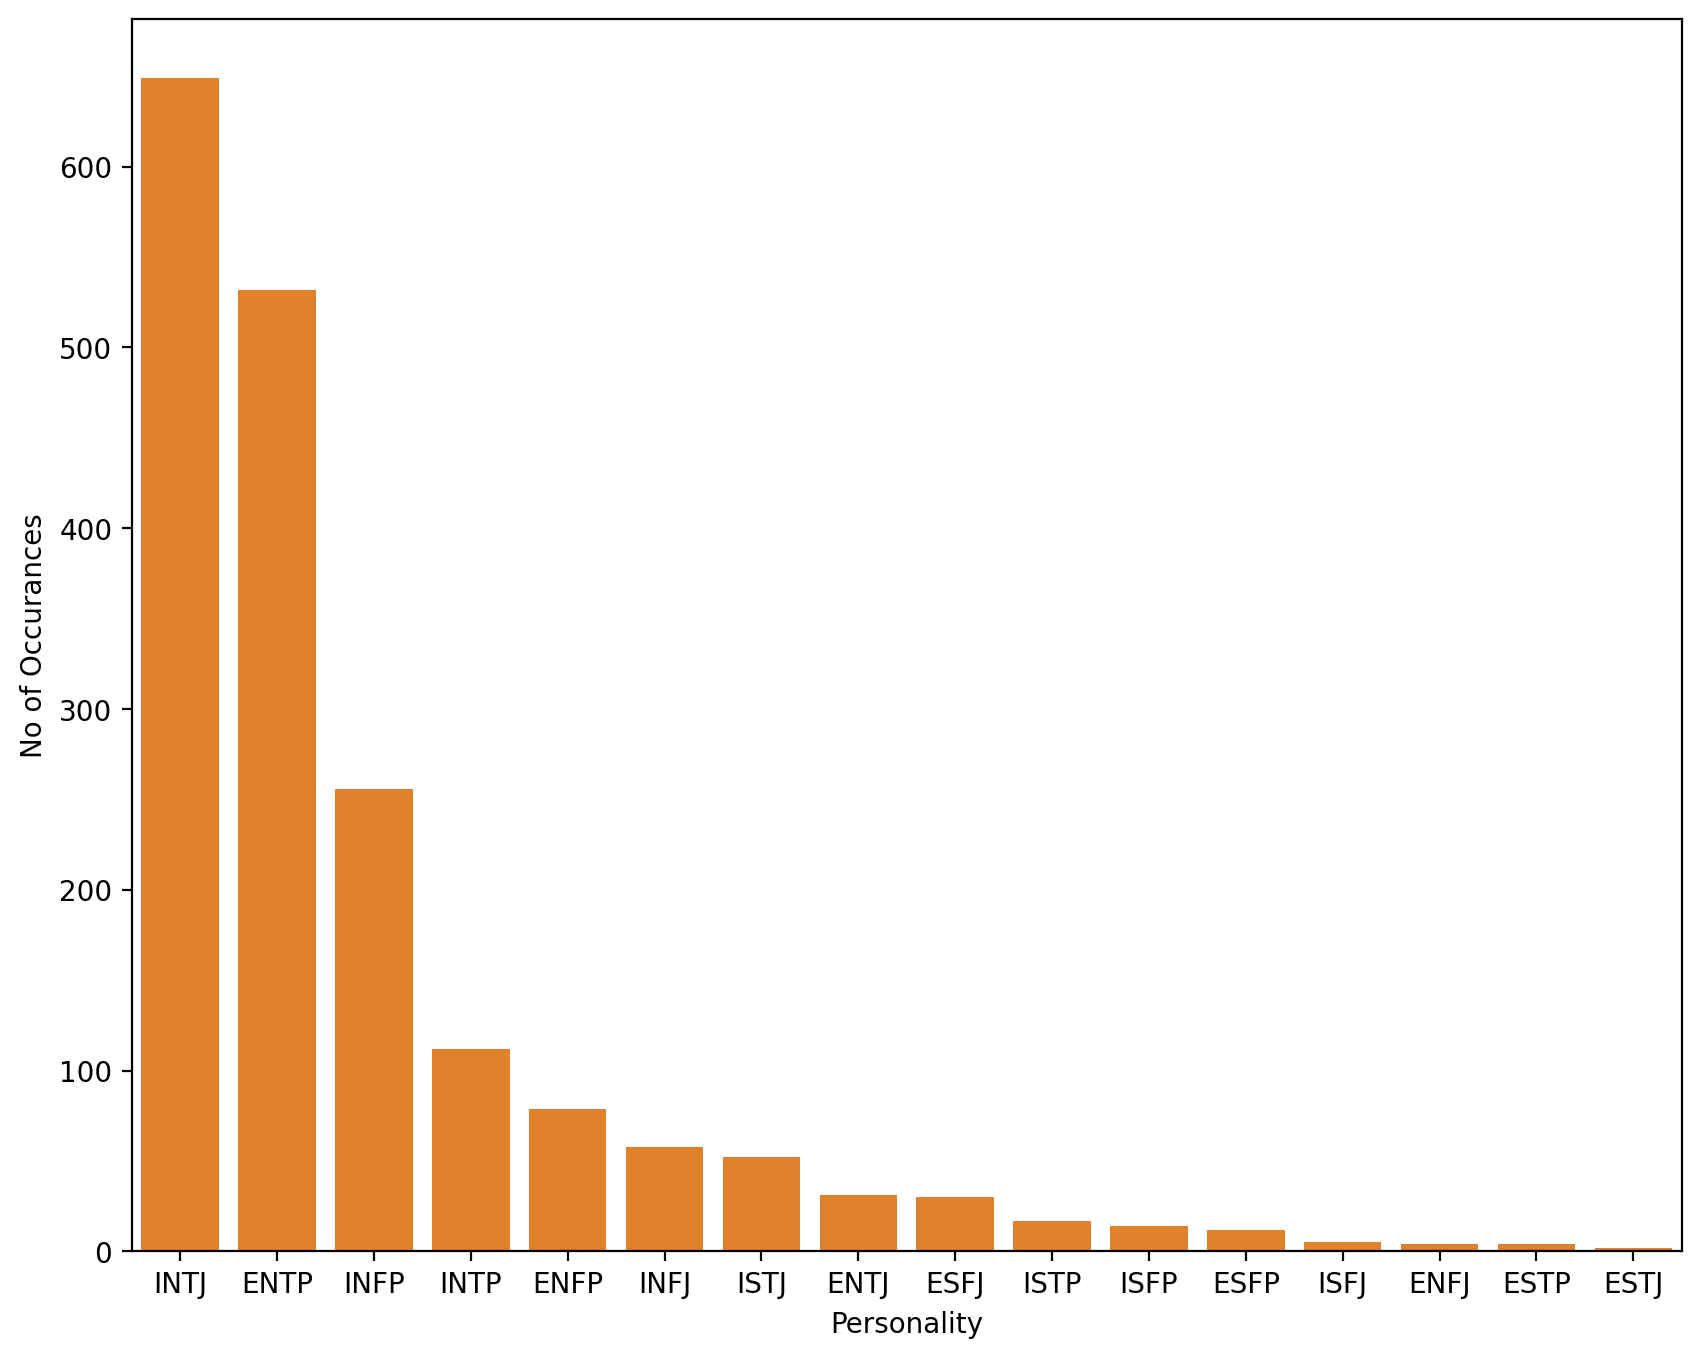

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

count_all=np.unique(pred_all,return_counts=True)

pred_df=pd.DataFrame({'personality':count_all[0],'count':count_all[1]},
                    columns=['personality','count'],index=None)

pred_df.sort_values('count',ascending=False,inplace=True)


plt.figure(figsize=(10,8))

sns.barplot(x=pred_df['personality'],y=pred_df['count'],alpha=0.8)

sns.barplot(data=pred_df,x='personality',y='count')

plt.xlabel("Personality")

plt.ylabel("No of Occurances")

plt.show()
         


In [103]:
pred_df['percent']=pred_df['count'] / pred_df['count'].sum()





In [104]:
pred_df['description']=pred_df['personality'].apply(lambda x:" ".join([mbti[i] for i in list(x)]))

In [105]:
print(pred_df)

   personality  count   percent                               description
10        INTJ    649  0.349488   Introversion Intutions Thinking Judging
3         ENTP    532  0.286484  Extroversion Intutions Thinking Perceive
9         INFP    256  0.137857   Introversion Intutions Feeling Perceive
11        INTP    112  0.060312  Introversion Intutions Thinking Perceive
1         ENFP     79  0.042542   Extroversion Intutions Feeling Perceive
8         INFJ     58  0.031233    Introversion Intutions Feeling Judging
14        ISTJ     52  0.028002     Introversion Sensing Thinking Judging
2         ENTJ     31  0.016694   Extroversion Intutions Thinking Judging
4         ESFJ     30  0.016155      Extroversion Sensing Feeling Judging
15        ISTP     17  0.009155    Introversion Sensing Thinking Perceive
13        ISFP     14  0.007539     Introversion Sensing Feeling Perceive
5         ESFP     12  0.006462     Extroversion Sensing Feeling Perceive
12        ISFJ      5  0.002693      I

In [106]:
labels=pred_df['description']

sizes=pred_df['percent']*100

trace=go.Pie(labels=labels,values=sizes)

layout=go.Layout(title='Kaggle user personality distribution')

data=[trace]

fig=go.Figure(data=data,layout=layout)

py.iplot(fig)

#plt.figure(figsize=(15,12))


plt.figure(figsize=(8, 6), dpi=550)



<Figure size 4400x3300 with 0 Axes>

<Figure size 4400x3300 with 0 Axes>

In [107]:
import plotly.graph_objs as go
import plotly.offline as py

labels = pred_df['description']
sizes = pred_df['percent'] * 100

trace = go.Pie(labels=labels, values=sizes)

layout = go.Layout(
    title='Kaggle user personality distribution',
    width=700,   # wider plot
    height=500    # taller plot
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [108]:
print("fine done")

fine done
